# COFFEE SALES DATASET

## ABOUT DATASET

This dataset contains coffee shop transaction records, including details about sales, payment type, time of purchase, and customer preferences. The major task of this datset is to analyze the trends of coffee sales based on various factors like the time of the day, the type of the coffee, how the sales trend change based on the month, and days of week. Also, we analyze the revenue trends over the period of time.

## COLUMN DESCRIPTION

* hour_of_day → Hour of purchase (0–23)

* cash_type → Mode of payment (cash / card)

* money → Transaction amount (in local currency)

* coffee_name → Type of coffee purchased (e.g., Latte, Americano, Hot Chocolate)

* Time_of_Day → Categorized time of purchase (Morning, Afternoon, Night)

* Weekday → Day of the week (e.g., Mon, Tue, …)

* Month_name → Month of purchase (e.g., Jan, Feb, Mar)

* Weekdaysort → Numeric representation for weekday ordering (1 = Mon, 7 = Sun)

* Monthsort → Numeric representation for month ordering (1 = Jan, 12 = Dec)

* Date → Date of transaction (YYYY-MM-DD)

* Time → Exact time of transaction (HH:MM:SS)

In [1]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
coffee= pd.read_csv('Coffee_sales.csv')
print('Rows:',coffee.shape[0])
print('Columns:',coffee.shape[1])

Rows: 3547
Columns: 11


In [3]:
#SHOW THE TOP 5 ROWS
coffee.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
#Lets see the info of the data:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
#Weekday and Monthsort columns are redundant, therefore we droop those columns.
coffee.drop(columns=['Weekdaysort', 'Monthsort'], inplace=True)

**INFERENCE**
* There are 3547 rows and 11 columns, overall it is a moderate dataset
* It has 7 quanlitative and 4 quantitative features.
* The dataset doesn't have any null values.

## DESCRIPTIVE ANALYSIS

In [6]:
coffee.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7


**INFERENCE**
* Minimum sales have been made around 6:00 in the morning while maximum sales have been around 22:00.
* Average expenditure on the coffee is around 31.5 dollars, maximum expenditure of coffee is around 39 dollars, data is slightly left skewed.

In [7]:
#SUMMARY: for categorical columns
coffee.describe(exclude=np.number).T

,count,unique,top,freq
cash_type,3547,1,card,3547
coffee_name,3547,8,Americano with Milk,809
Time_of_Day,3547,3,Afternoon,1205
Weekday,3547,7,Tue,572
Month_name,3547,12,Mar,494
Date,3547,381,2024-10-11,26
Time,3547,3547,18:11:38.635000,1


**INFERENCE**
* The payments have mostly been made by card.
* Americano with Milk is the coffee sold for the maximum number of times.
* The purchases have been mostly made in the afternoons.
* Tuesdays have seen the highest sales.
* The shop has made maximum sales in the month of March.
* The maximum no. of coffees were sold on 11 oct 2024

## VISUAL ANALYSIS

In [8]:
num_cols=coffee.select_dtypes(np.number).columns
num_cols

Index(['hour_of_day', 'money'], dtype='object')

In [9]:
cat_cols=coffee.select_dtypes(exclude=np.number).columns
cat_cols

Index(['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name',
       'Date', 'Time'],
      dtype='object')

### DISTRIBUTION OF MONEY/ SALES AMOUNT

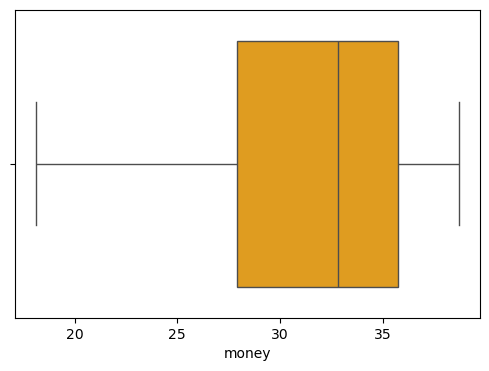

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=coffee, x='money', color='orange')
plt.show()

**Inferences**
* Clearly , there are no outliers in the sales amount.
* Mostly, the sale amount ranges from 27-37 dollar

### DISTRIBUTION OF COFFEE TYPE 

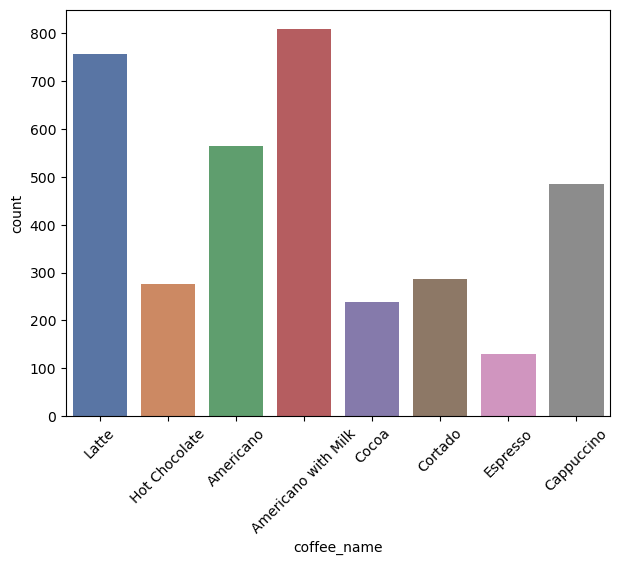

In [12]:
sns.countplot(data=coffee, x='coffee_name', palette='deep')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Inferences**
* There are 8 types of coffees available at the shop.
* Among these, Americano with milk is the most sold while Espresso is the least sold.
* Americano with milk is the top product by sales volume

### DISTRIBUTION OF PAYMENT TYPE

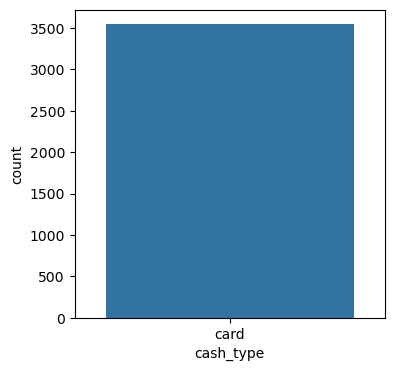

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(data=coffee, x='cash_type')
plt.show()

**INFERENCE** 
* The consumers have used only card for making the payments.

### DISTRIBUTION OF TRANSACTIONS PER HOUR/ PER DAY/ PER MONTH

<Axes: xlabel='hour_of_day', ylabel='count'>

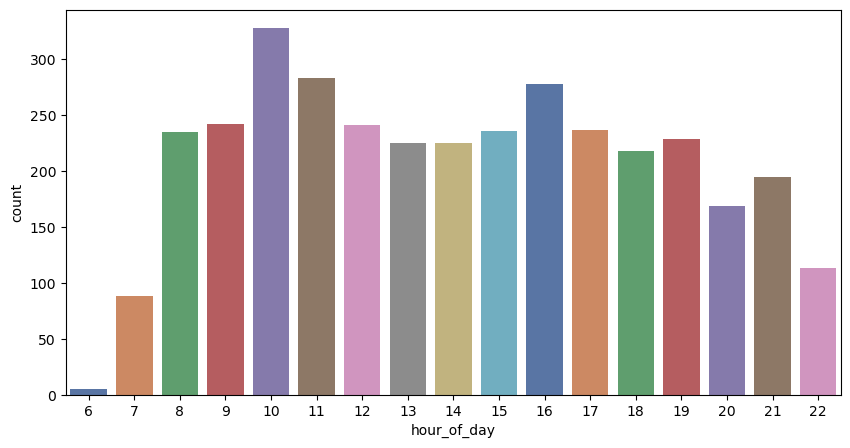

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=coffee, x='hour_of_day', palette='deep')

<Axes: xlabel='Weekday', ylabel='count'>

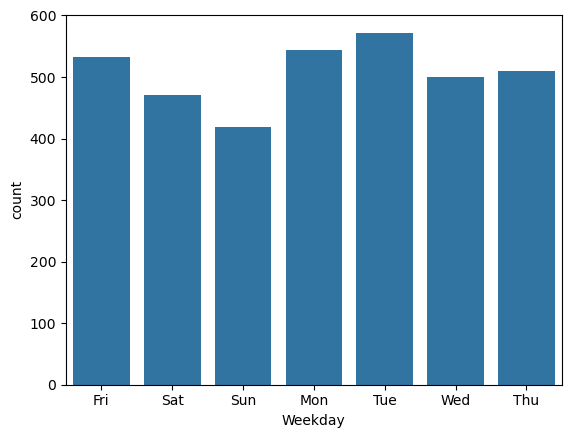

In [15]:
sns.countplot(data=coffee, x='Weekday')

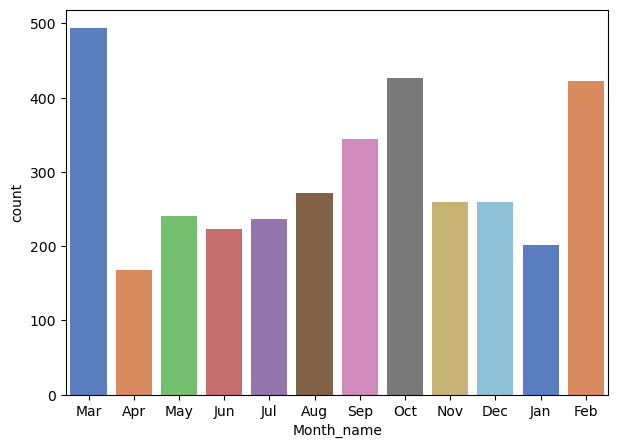

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data=coffee, x='Month_name', palette='muted')
plt.show()

**INFERENCES**
* Highest number of sales have been made around 10:00 AM while lowest number of sales were made around 6:00 AM
* Highest number of sales were observed on Tuesday, while lowest sales were made on Sunday
* March saw the maximum no. of sales while April recorded the lowest no. of Sales.

### BIVARIATE AND MULTIVARIATE ANALYSIS

### How does coffee type relate to sales amount?

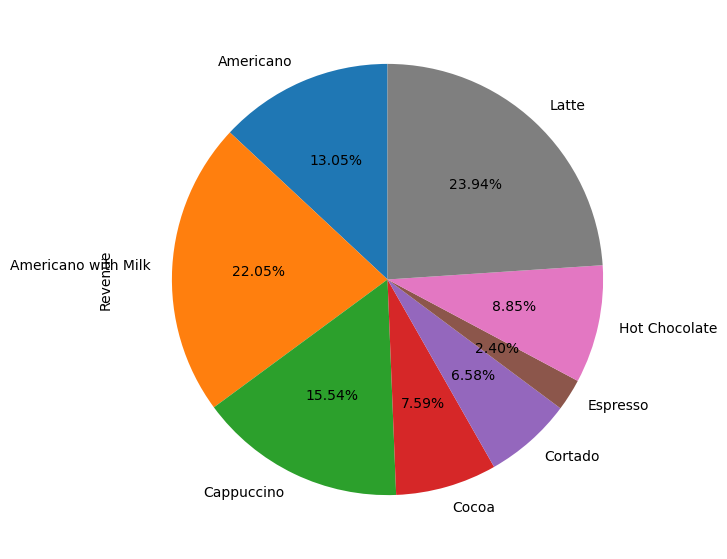

In [28]:
coffee.groupby(by='coffee_name')['money'].sum().plot(kind='pie', autopct='%.2f%%', figsize=(10,7), startangle=90)
plt.ylabel('Revenue')
plt.show()

**INFERENCE**

* Latte has maximum sales amount while espresso lowest total sales amount.
* Thus latte is the top product in terms of revenue

#### Does time-of-day (hour) influence which coffee types are bought?

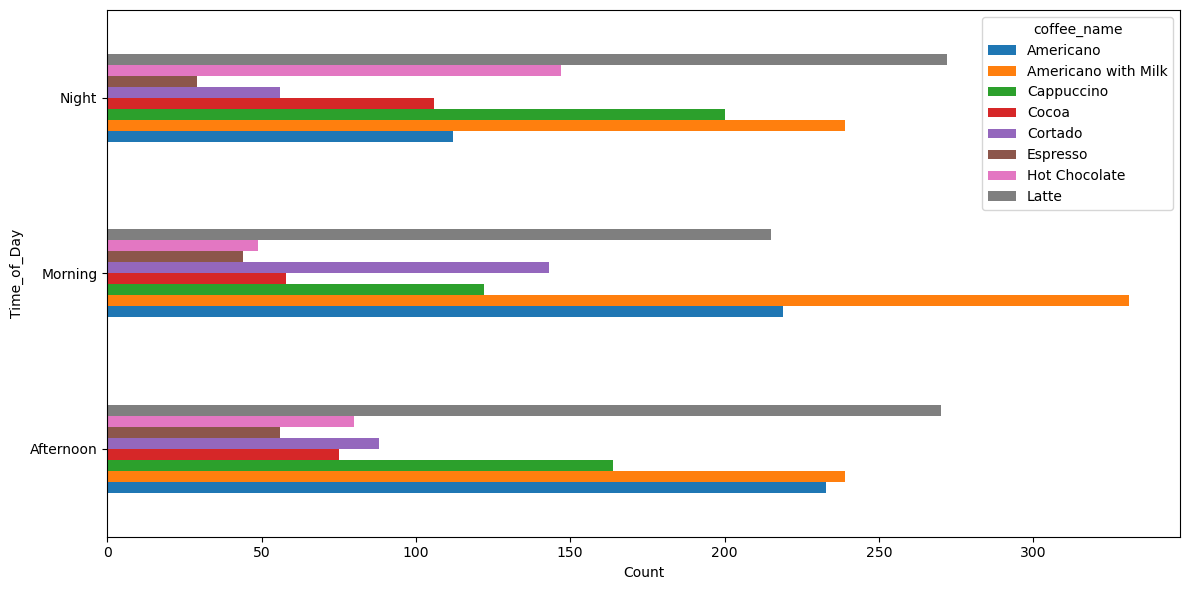

In [18]:
pd.crosstab(coffee['Time_of_Day'], coffee['coffee_name']).plot(kind='barh', figsize=(12,6))
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**INFERENCE**
* We can clearly see that for at different time of the day(Morning, Afternoon, Evening), different coffees are preferred.
* At night, latte is sold the most while, espresso is the least preferred.
* In the Morning, Americano with milk is preferred the most, while espresso still remains the least preferred.
* During the afternoon, Latte is sold the most while espresso is the least sold.

#### How does day-of-week affect different coffee types?

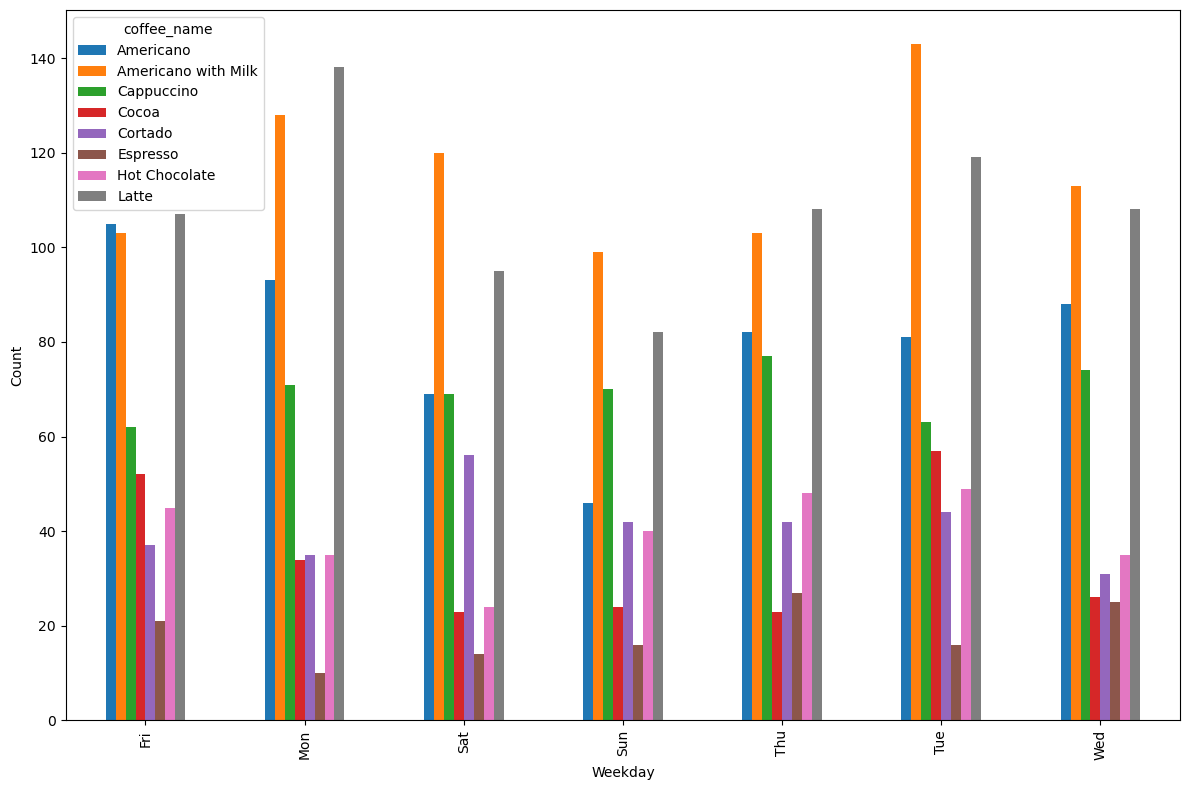

In [19]:
pd.crosstab(coffee['Weekday'], coffee['coffee_name']).plot(kind='bar', figsize=(12,8))
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**INFERENCES**

* Latte is the most sold on Friday, Monday, Thursday, while americano with milk remains the most sold on Saturday, Monday, Tuesday
* While espresso  remains the least sold, except on Thursday where cocoa is the least sold.

#### Do certain months see more sales of particular coffee types?

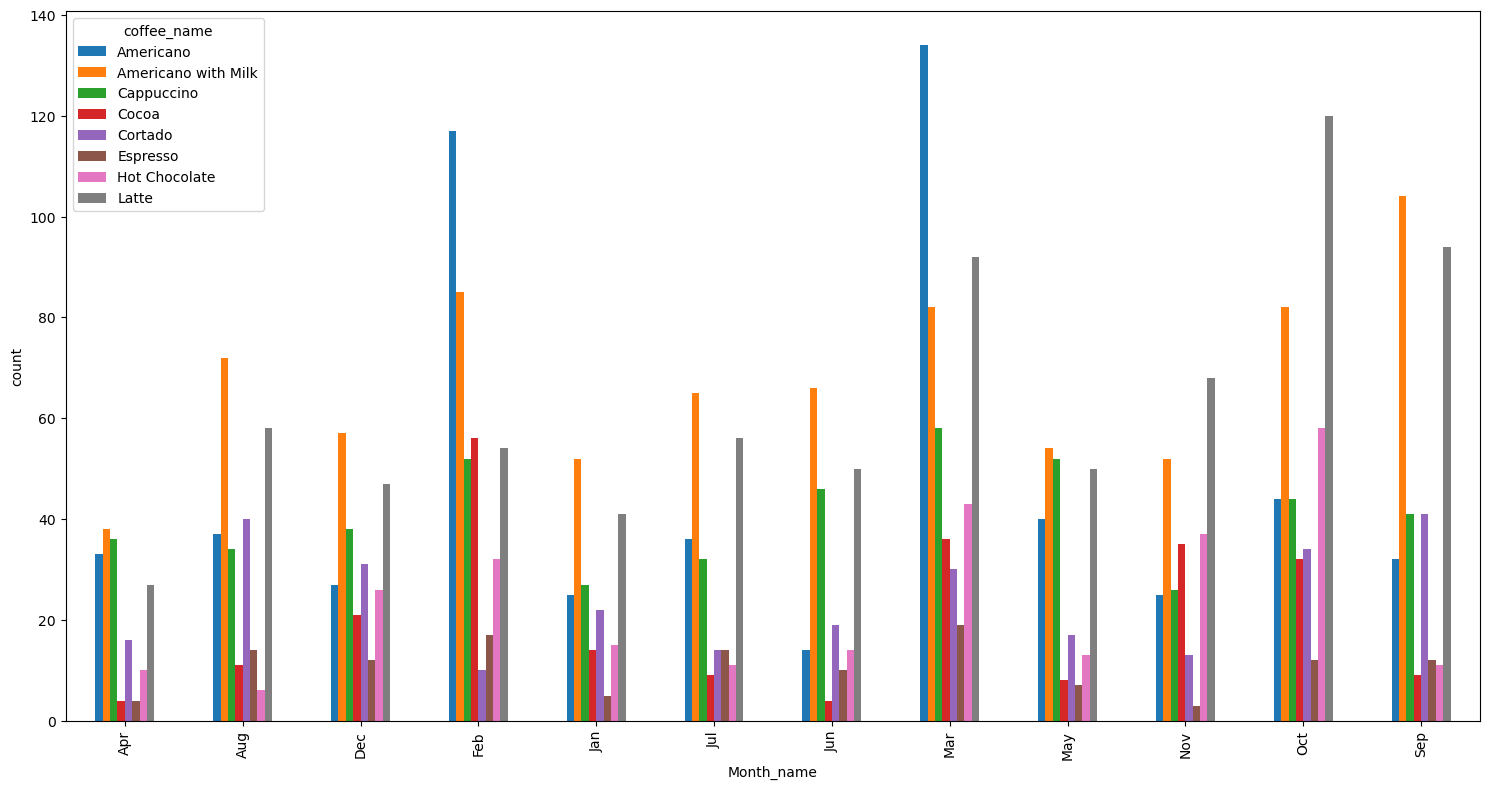

In [20]:
pd.crosstab(coffee['Month_name'], coffee['coffee_name']).plot(kind='bar', figsize=(15,8))
plt.ylabel('count')
plt.tight_layout()
plt.show()

**INFERENCE**

* Americano is the most sold by in months of February and March, while in rest of the months Americano with milk shows the highest sales volume trend.

## TIME SERIES ANALYSIS 

#### DAILY SALES TREND

In [21]:
coffee['Time'] = pd.to_datetime(coffee['Time'])
coffee['Date'] = pd.to_datetime(coffee['Date'])

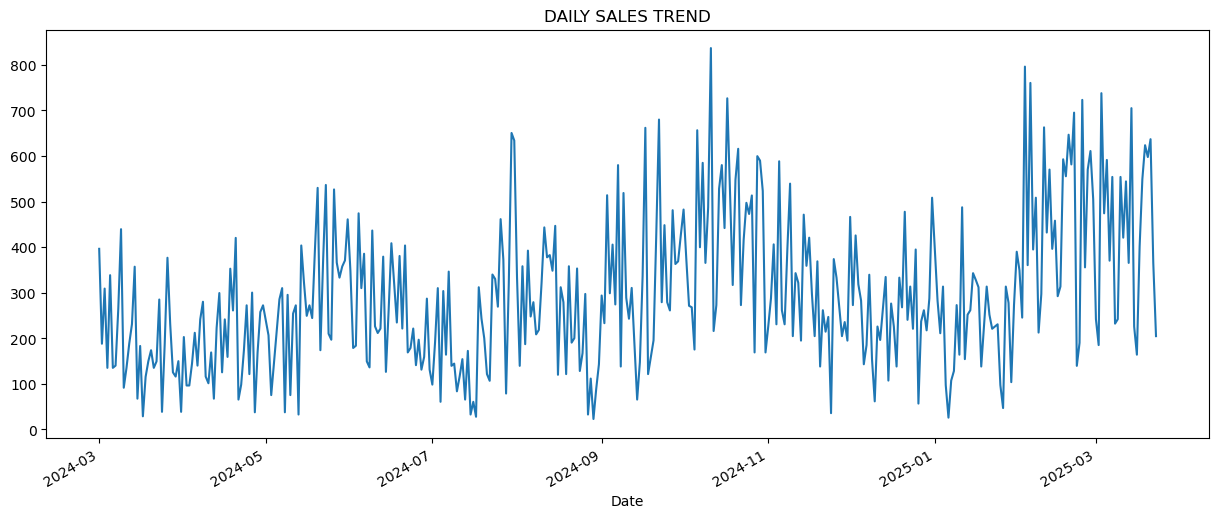

In [22]:
plt.title('DAILY SALES TREND')
coffee.groupby(by='Date')['money'].sum().plot(kind='line', figsize=(15,6))
plt.show()

#### HOURLY SALES TREND

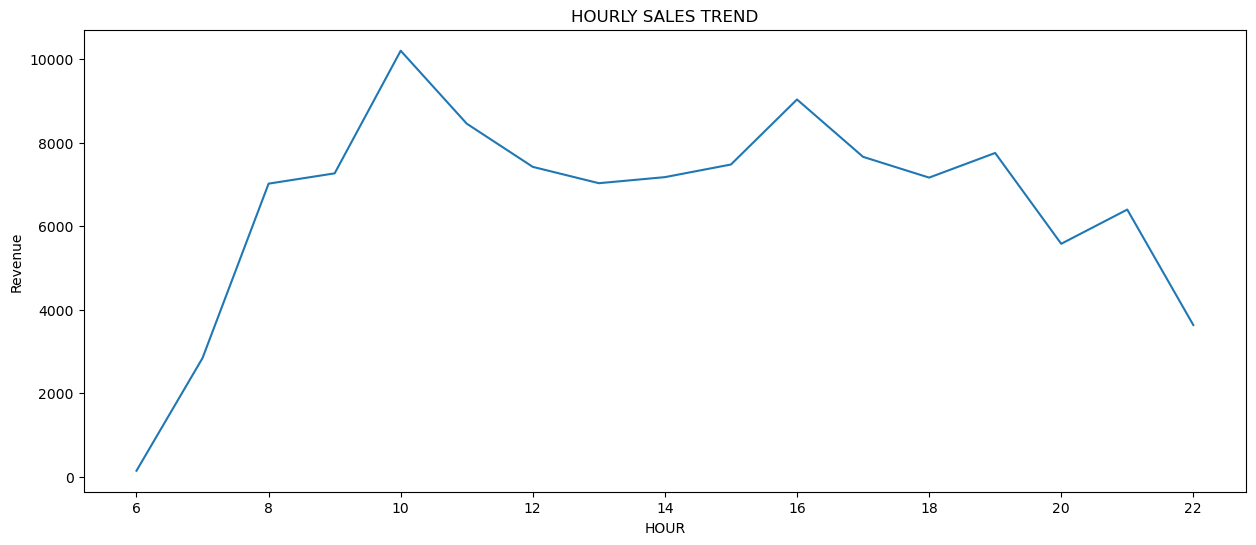

In [23]:
plt.title('HOURLY SALES TREND')
coffee.groupby(by='hour_of_day')['money'].sum().plot(kind='line', figsize=(15,6))
plt.xlabel('HOUR')
plt.ylabel('Revenue')
plt.show()

#### WEEKLY SALES TREND

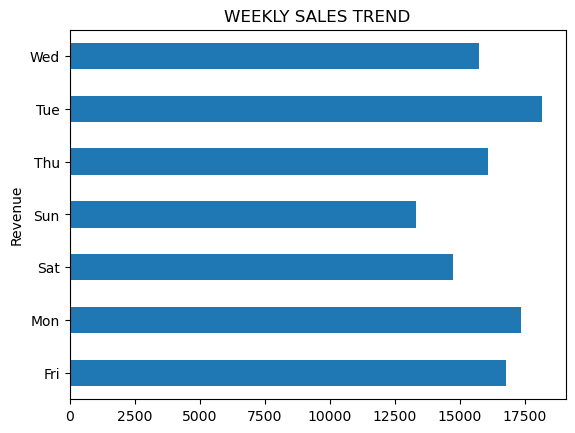

In [37]:
plt.title('WEEKLY SALES TREND')
coffee.groupby(by='Weekday')['money'].sum().plot(kind='barh')
plt.ylabel('Revenue')
plt.show()

#### MONTHLY SALES TREND

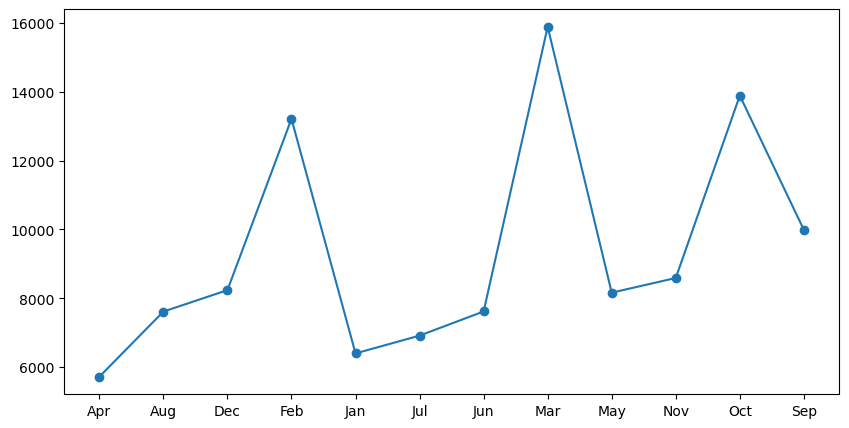

In [25]:
# Monthly Sales
monthly_sales = coffee.groupby('Month_name')['money'].sum()
plt.figure(figsize=(10,5))
plt.plot( monthly_sales.index, monthly_sales.values, marker='o')
plt.show()

**INFERENCE**

* The daily trends of october, 2024 are high, while daily trends of revenue of march, 2025 are high.
* We can observe highest revenue generation in March and hike can also be observed in October while a dip can be observed April and January.
* Weekly revenue sales trend show  that maximum sales amount is achieved on Tuesday.

#### Analysis of revenue generated by coffee based on time  of day

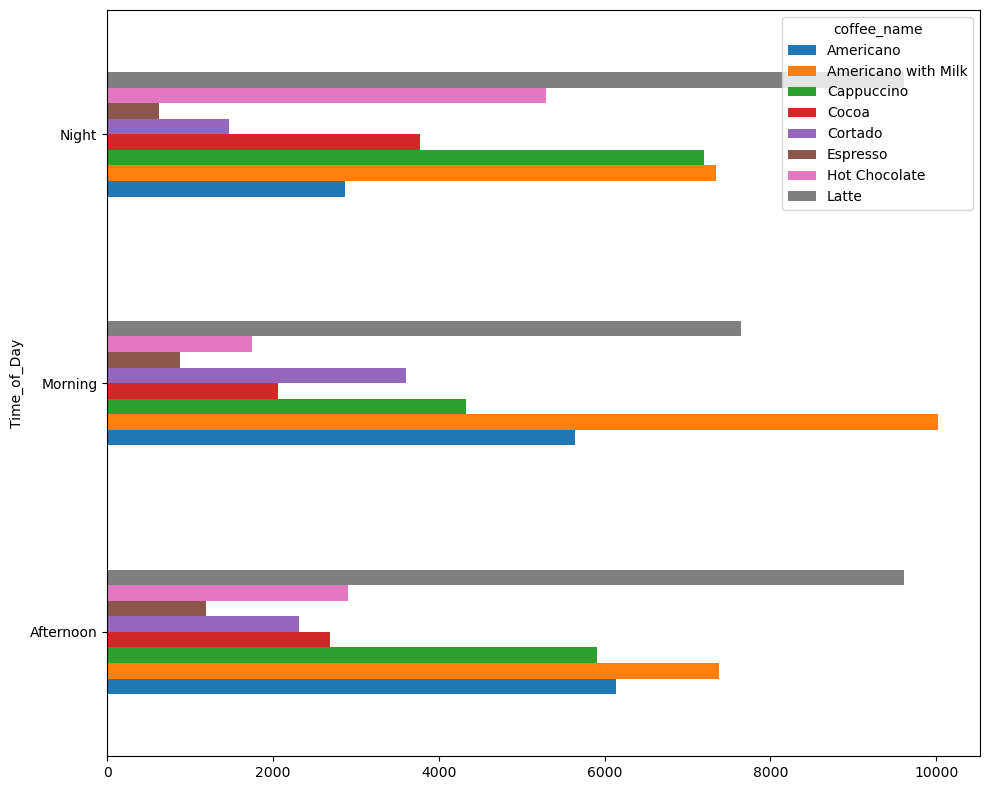

In [26]:
pd.pivot_table(data=coffee, index= 'Time_of_Day', columns='coffee_name', values='money', aggfunc='sum').plot(kind='barh',figsize=(10,8))
plt.tight_layout()

**INFERENCE**
* During afternoon and night, latte generates higher revenue while during afternoon americano with milk generates highest revenue.
* Espresso generates lowest revenue at all times of the day

**FINAL INFERENCES**

* The coffee which has highest sales by volume is Americano with Milk while Latte generates the maximum revenue for the shop.
* In the afternoon and during the night latte is sold the most generating the most revenue for these times of the day, while in the morning americano with milk has highest sales recording maximum sales for that time of the day.
* All of the payments have been made by card.
* The 10th hour of the day is the busiest hour with maximum orders and highest revenue.
* Tuesday is the busiest day, and maximum revenue is generated.
* Latte is the most sold on Friday, Monday, Thursday, while americano with milk remains the most sold on Saturday, Monday, Tuesday.
* The coffee sales revenue has been highest during the month of March, october has also seen a high revenue generation.